In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [19]:
df = pd.read_csv('titanic_dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      874 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [275]:
df.head(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3 pclass,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1-pclas,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3-pclass,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3-pclass,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2-pclass,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [7]:
# cleaning data: how many NaN values for each column (variable)
df.isna().sum()

Survived                    0
Pclass                      0
Name                        0
Sex                        13
Age                         0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        0
dtype: int64

In [9]:
df = df.dropna(subset=['Sex'])
df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [10]:
# checking for empty strings
(df == '').sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [14]:
# check for unique values for each column
df.nunique(axis='index',dropna='false')

Survived                     2
Pclass                      23
Name                       887
Sex                          2
Age                        109
Siblings/Spouses Aboard     11
Parents/Children Aboard     10
Fare                       261
dtype: int64

In [15]:
df['Sex'].unique()
# no typos in this variable

array(['male', 'female', nan], dtype=object)

In [16]:
df['Pclass'].unique()

array(['3 pclass', '1 pclass', '1 pcl', '1-pclas', '3-pclass', '2-pclass',
       '1-pclass', '2 pcl', '3 pcla', '1 pcla', '2 pclas', '1-pcl',
       '2 pclass', '3-pclas', '1-pcla', '3 pclas', '1 pclas', '2 pcla',
       '2-pclas', '3-pcla', '2-pcla', '3-pcl', '3 pcl'], dtype=object)

In [27]:
# convert all pclasses to their respective numbers
# this is object not string, this is what to do if it was string: class_df = pd.to_numeric(df['Pclass'])
# check if p1 in i (loop through column)
# p1 = '1'
# p2 = '2'
# p3 = '3'
# df.loc[df['Pclass'].str.contains(p1), 'Pclass'] = '1'
# df.loc[df['Pclass'].str.contains(p2), 'Pclass'] = '2'
# df.loc[df['Pclass'].str.contains(p3), 'Pclass'] = '3'
# df
df['Pclass_clean'] = df['Pclass'].str.extract(r'(\d)').astype('int') 
# this is a more efficient way to do it, creates a new column
df

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_clean,Sex_male
0,0,3 pclass,Mr. Owen Harris Braund,22.0,1,0,7.2500,3,1
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,1,0
2,1,3 pclass,Miss. Laina Heikkinen,26.0,0,0,7.9250,3,0
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0
4,0,3 pclass,Mr. William Henry Allen,35.0,0,0,8.0500,3,1
...,...,...,...,...,...,...,...,...,...
882,0,2 pclass,Rev. Juozas Montvila,27.0,0,0,13.0000,2,1
883,1,1-pclass,Miss. Margaret Edith Graham,19.0,0,0,30.0000,1,0
884,0,3-pcla,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,3,0
885,1,1-pclass,Mr. Karl Howell Behr,26.0,0,0,30.0000,1,1


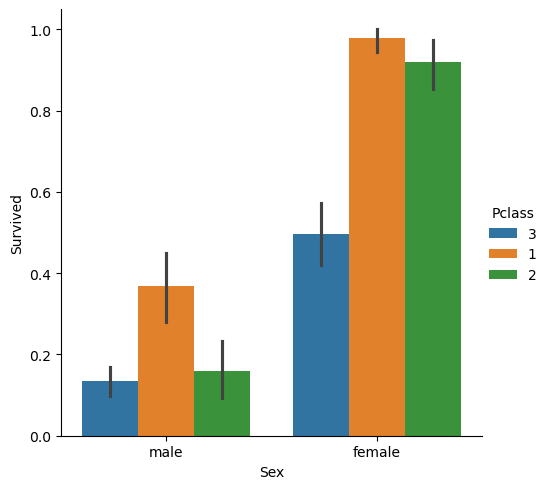

In [299]:
sns.catplot(x='Sex',y='Survived', hue = 'Pclass', kind = 'bar', data=df)
#this chart agrees with the theory that women and children were let off first on the titanic, 
#also higher classes had better survival rate, inferring from the data

In [21]:
# clean up age data
df['Age'].astype(int).abs()

0      22
1      38
2      26
3      35
4      35
       ..
882    27
883    19
884     7
885    26
886    32
Name: Age, Length: 887, dtype: int32

In [287]:
age_groups = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100])

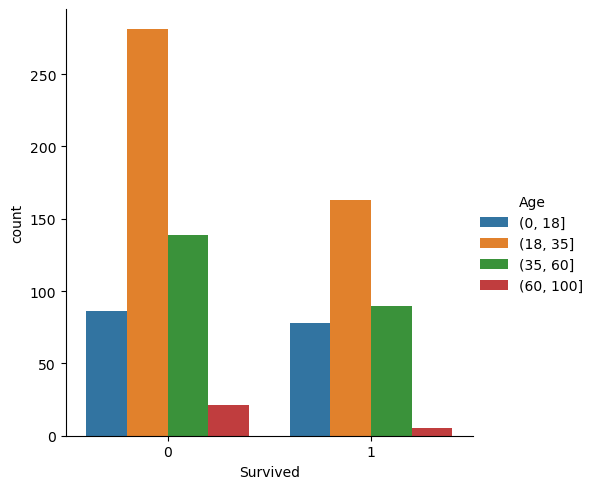

In [296]:
sns.catplot(df, hue=age_groups, x='Survived', kind='count')

Text(0.5, 1.0, 'Survival by passenger class')

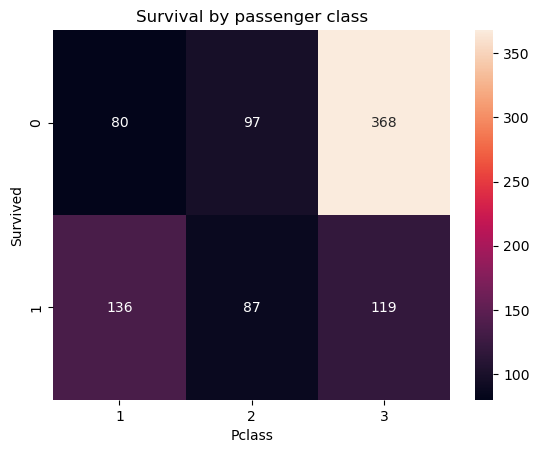

In [307]:
# heatmap
ct = pd.crosstab(df['Survived'],df['Pclass'])
sns.heatmap(data=ct, annot = True, fmt='g')
plt.title('Survival by passenger class')

In [324]:
# correlatin heatmap
df_subset = df[['Survived','Pclass','Age','Sex','Siblings/Spouses Aboard','Parents/Children Aboard']]
# df['Sex'].unique()
df_encoded = pd.get_dummies(df_subset, columns=['Sex'])
df_encoded.head(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Sex_female,Sex_male
0,0,3,22.0,1,0,False,True
1,1,1,38.0,1,0,True,False
2,1,3,26.0,0,0,True,False
3,1,1,35.0,1,0,False,False
4,0,3,35.0,0,0,False,True


<Axes: >

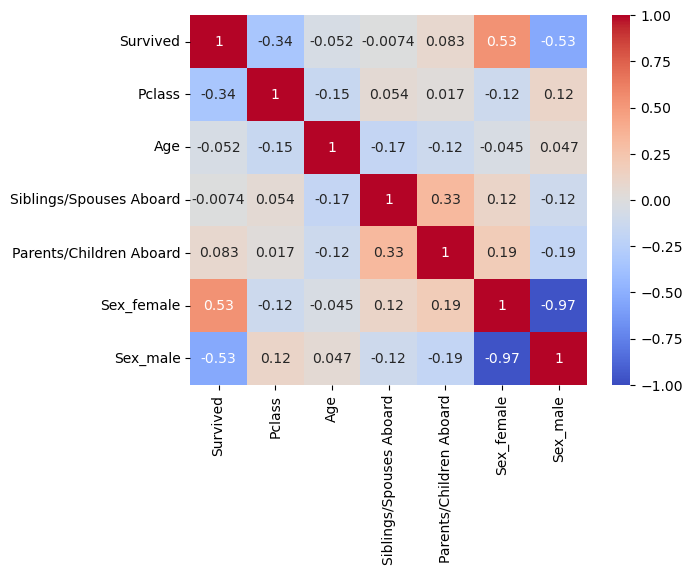

In [325]:
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [23]:
# one hot encoding sex column
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_clean,Sex_male
0,0,3 pclass,Mr. Owen Harris Braund,22.0,1,0,7.2500,3,True
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,1,False
2,1,3 pclass,Miss. Laina Heikkinen,26.0,0,0,7.9250,3,False
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,False
4,0,3 pclass,Mr. William Henry Allen,35.0,0,0,8.0500,3,True
...,...,...,...,...,...,...,...,...,...
882,0,2 pclass,Rev. Juozas Montvila,27.0,0,0,13.0000,2,True
883,1,1-pclass,Miss. Margaret Edith Graham,19.0,0,0,30.0000,1,False
884,0,3-pcla,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,3,False
885,1,1-pclass,Mr. Karl Howell Behr,26.0,0,0,30.0000,1,True


In [28]:
df['Sex_male'] = df['Sex_male'].astype(int)
df

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_clean,Sex_male
0,0,3 pclass,Mr. Owen Harris Braund,22.0,1,0,7.2500,3,1
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,1,0
2,1,3 pclass,Miss. Laina Heikkinen,26.0,0,0,7.9250,3,0
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0
4,0,3 pclass,Mr. William Henry Allen,35.0,0,0,8.0500,3,1
...,...,...,...,...,...,...,...,...,...
882,0,2 pclass,Rev. Juozas Montvila,27.0,0,0,13.0000,2,1
883,1,1-pclass,Miss. Margaret Edith Graham,19.0,0,0,30.0000,1,0
884,0,3-pcla,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,3,0
885,1,1-pclass,Mr. Karl Howell Behr,26.0,0,0,30.0000,1,1


In [29]:
# ml model using logistic regression
X = df[['Age','Sex_male','Pclass_clean']]
y = df['Survived']

In [32]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7528089887640449
Confusion Matrix:
 [[94 17]
 [27 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       111
           1       0.70      0.60      0.65        67

    accuracy                           0.75       178
   macro avg       0.74      0.72      0.73       178
weighted avg       0.75      0.75      0.75       178



In [38]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],columns=["Predicted 0", "Predicted 1"])
print(cm_df)

          Predicted 0  Predicted 1
Actual 0           94           17
Actual 1           27           40


In [43]:
# performing cross validation
model = LogisticRegression()
X_subset = df[['Age','Sex_male','Pclass_clean']]
cv_scores_subset = cross_val_score(model, X_subset, y, cv=5)
print("Cross-validation scores with subset of features:", cv_scores_subset)

Cross-validation scores with subset of features: [0.80898876 0.80898876 0.76271186 0.76271186 0.78531073]
